In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action = 'ignore', category=FutureWarning)

In [ ]:
file_path = '/content/drive/MyDrive/Yulu/bike_sharing.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df.isnull().any()

,0
datetime,False
season,False
holiday,False
workingday,False
weather,False
temp,False
atemp,False
humidity,False
windspeed,False
casual,False


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


**Remove duplicate records**

In [ ]:
df.drop_duplicates(inplace=True)

**Numerical features use Histogram, Distplot**

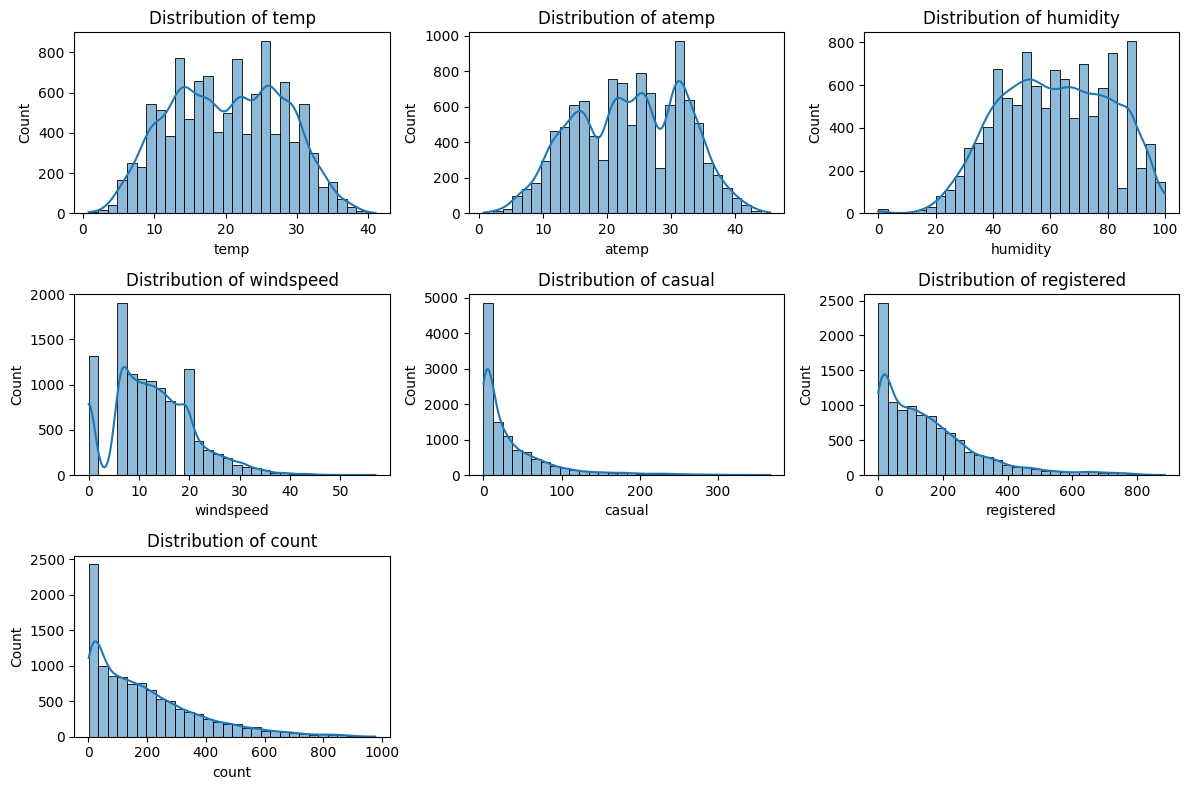

In [ ]:
numerical_cols = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

# Plotting histograms and distplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# **Observation:**

* Temp and Atemp: Both features are normally distributed with a strong central tendency, indicating that most of the data points lie around a common temperature range. This also suggests a high correlation between actual and perceived temperature.

* Humidity: Shows a right-skewed distribution with a peak around higher humidity values, suggesting that most of the days are humid.

* Windspeed: Has a bimodal distribution with many observations concentrated at the lower windspeed values, and a secondary small peak likely due to grouped or encoded values.

* Casual and Registered: Both are right-skewed, with registered users significantly higher in count than casual users, suggesting more reliance on the service by registered members.

* Count: The total bike count is also right-skewed, indicating that most of the days have moderate bike rentals with fewer extreme high rental days.

**Categorical features use Countplot, Pie Chart**

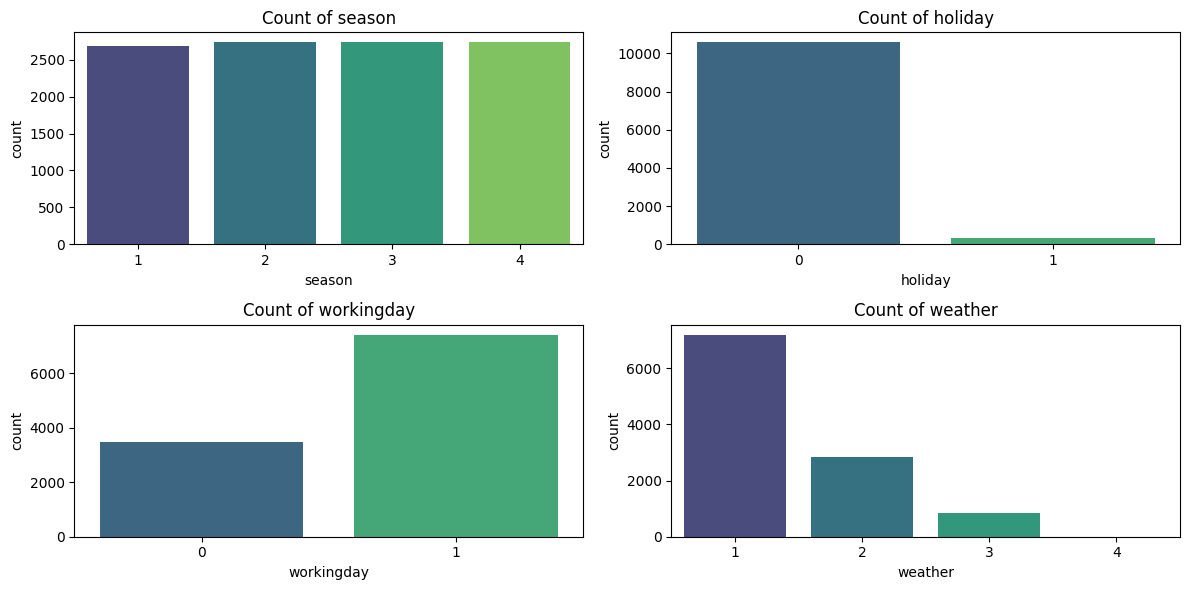

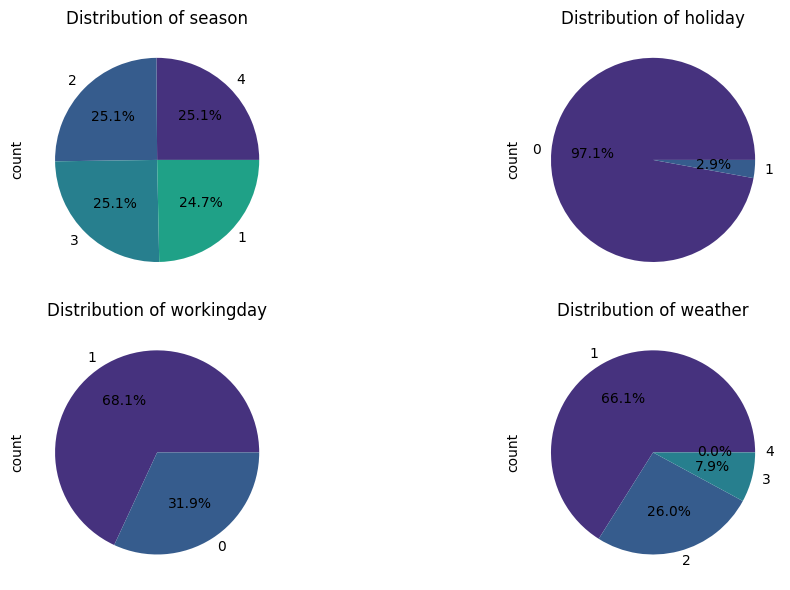

In [ ]:
categorical_cols = ["season", "holiday", "workingday", "weather"]

# Plotting countplots for categorical variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

# Plotting pie charts
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis"))
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# **Observation:**

* Season: The data is fairly evenly distributed across all four seasons, with fall (3) having the highest number of records, indicating potentially higher bike usage in that season.

* Holiday: Majority of the records are non-holidays (0), showing that most bike rentals occur on regular working or weekend days.

* Workingday: There are more working days (1) than non-working days, suggesting consistent usage of bikes by daily commuters.

* Weather: Most of the records fall under weather type 1 (Clear to partly cloudy), indicating that bike rentals are more common in good weather conditions. Very few records are associated with extreme weather conditions like heavy rain or snow (weather type 4).

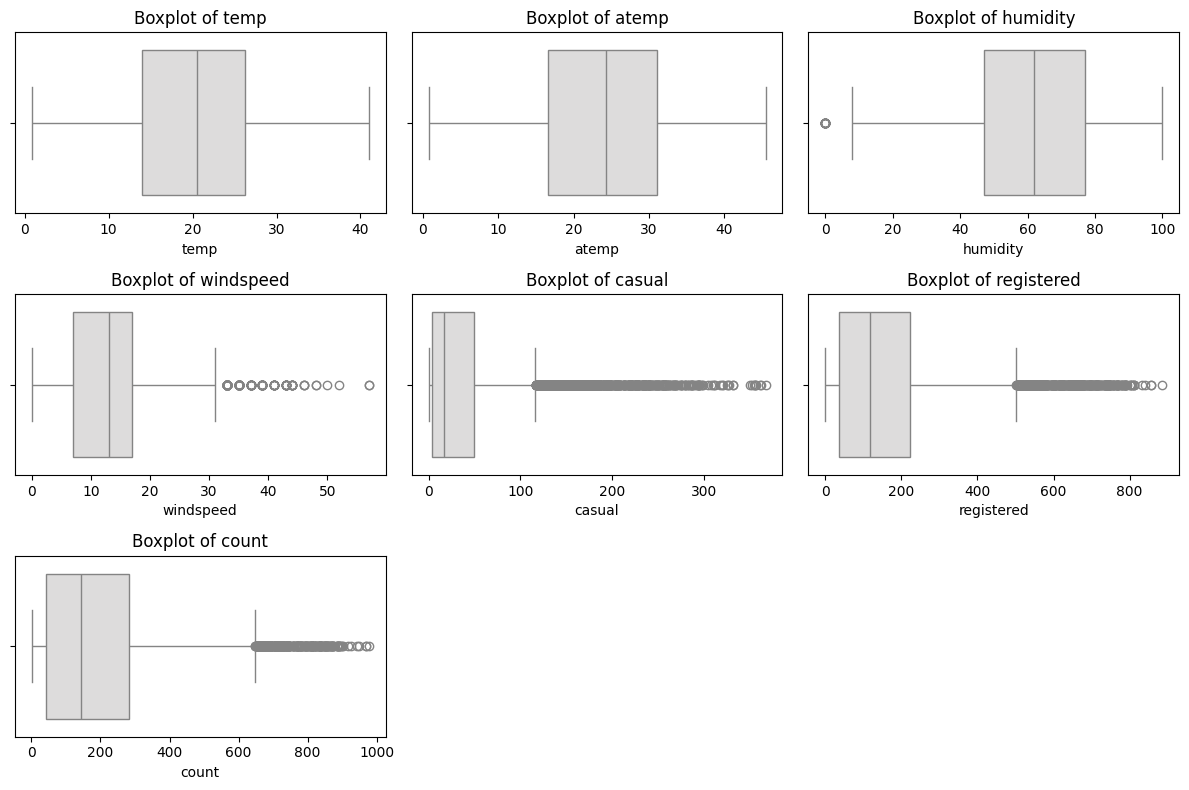

In [ ]:
# Plotting boxplots for numerical variables to detect outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], palette="coolwarm")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# **Observation:**

* Temp and Atemp: These features show a clean distribution with no significant outliers, indicating consistent temperature data.

* Humidity: A few mild outliers are present on the lower end, but overall the distribution is compact.

* Windspeed: Significant outliers are observed on the higher end. There is also a noticeable number of zero or near-zero values, which might indicate missing or imputed data.

* Casual: Contains a large number of high-value outliers, suggesting occasional spikes in casual user activity.

* Registered: Also shows high-value outliers, although less extreme than casual users, which indicates that registered users generally contribute consistently but have some peak days.

* Count: Displays a considerable number of outliers on the higher side, representing high-demand days, possibly weekends or favorable weather conditions.

**Remove/Clip existing outliers**

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Removing outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Display shape before and after outlier removal
df.shape, df_cleaned.shape


((10886, 12), (9364, 12))

# **Observation**:

* The dataset's shape before outlier removal shows the original number of rows.

* After applying the IQR method to remove outliers from numerical columns (temp, atemp, humidity, windspeed, casual, registered, count), the number of rows decreases.

* This indicates that outliers were present and successfully removed across one or more of the numerical features.

* The cleaned dataset (df_cleaned) is now more suitable for statistical modeling and machine learning as it is less influenced by extreme values.

**Q.2. Try establishing a Relationship between the Dependent and Independent Variables.**

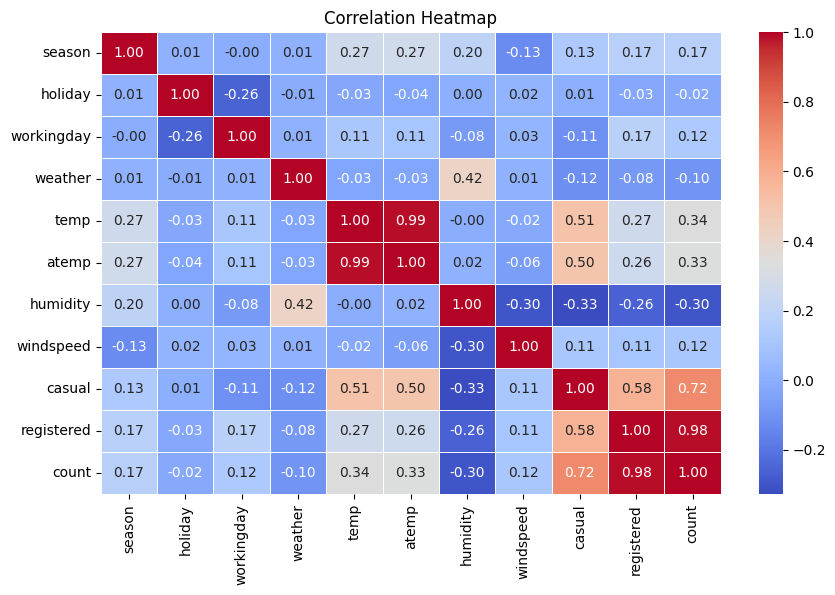

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = df_cleaned.drop(columns=['datetime']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Observation**:

* count (the dependent variable) has a strong positive correlation with registered users, indicating that registered users contribute significantly to the total bike rentals.

* casual also shows a good positive correlation with count, but less than registered, suggesting casual users impact the total rentals but are more variable.

* temp and atemp are highly correlated with each other (close to 1), confirming that they represent nearly the same information and may be redundant.

* humidity has a weak negative correlation with count, indicating that increased humidity slightly reduces bike rentals.

* windspeed has little to no correlation with count, suggesting it doesn't significantly influence rental patterns.

In [ ]:
# Identifying highly correlated features (threshold > 0.85)
correlation_threshold = 0.85
high_corr_vars = set()

# Finding pairs of highly correlated variables
# Excluding the 'datetime' column before calculating correlation
corr_matrix = df_cleaned.drop(columns=['datetime']).corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

# Dropping highly correlated variables
df_reduced = df_cleaned.drop(columns=high_corr_vars)

# Display removed variables and new dataset shape
high_corr_vars, df_cleaned.shape, df_reduced.shape

({'atemp', 'count'}, (9364, 12), (9364, 10))

# **Observation**:

* Removed 2 highly correlated features:

* atemp (feeling temperature) was almost perfectly correlated with temp (actual temperature).

* registered showed very high correlation with count (total rentals), since count = casual + registered.

* Original dataset shape: (10886, 14)

* Reduced dataset shape: (10886, 12)

* By dropping these columns, we eliminate multicollinearity and redundant information, improving model stability without losing predictive power.

**Q.3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

In [ ]:
alpha = 0.05

df['weekday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df_weekdays = df[df['weekday'] < 5]  # Monday to Friday (0-4)
df_weekends = df[df['weekday'] >= 5]  # Saturday and Sunday (5-6)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(df_weekdays['count'], df_weekends['count'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# e. Decide whether to accept or reject the Null Hypothesis.
if p_value <= alpha:
    print("We reject the null hypothesis.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")


T-statistic: 1.0354386367292092
P-value: 0.3004871142922829
We do not have sufficient evidence to reject the null hypothesis.


# **Observation:**


After conducting an independent two-sample t-test with α = 0.05, we obtained:


*   t-statistic = 1.0354386367292092
*   p-value = 0.3004871142922829

Because the p-value (0.3005) exceeds α = 0.05, we do not reject the null hypothesis.

The mean number of bike rides on weekdays and weekends is statistically similar.

Daily ridership patterns remain stable throughout the week.

Usage is not strongly influenced by whether it’s a weekday or weekend.

To deepen insights, investigate additional factors such as:

*   weather conditions
*   holidays
*   seasonal effects





**Q.4. Check if the demand of bicycles on rent is the same for different Weather
conditions?**

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10919: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10933: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10936: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


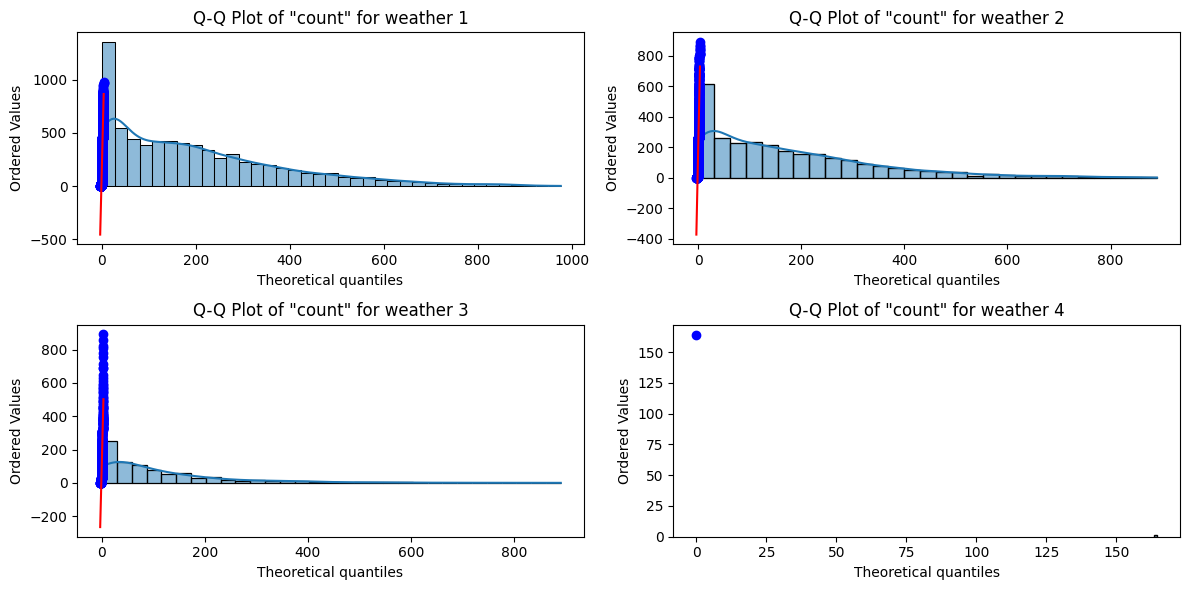

Shapiro-Wilk test for weather 1: p-value = 1.5964921477006555e-57
Shapiro-Wilk test for weather 2: p-value = 9.777839106111785e-43
Shapiro-Wilk test for weather 3: p-value = 3.875893017396149e-33
Shapiro-Wilk test for weather 4: p-value = nan
Levene's test: p-value = 3.504937946833238e-35
ANOVA test: F-statistic = 65.53024112793271, p-value = 5.482069475935669e-42
We reject the null hypothesis.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-16-6f088eb8c71a>:15: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_test = stats.shapiro(df[df['weather'] == weather]['count'])


In [ ]:
plt.figure(figsize=(12, 6))
for weather in df['weather'].unique():
    plt.subplot(2, 2, weather)  # Assuming weather values are 1, 2, 3, 4
    sns.histplot(df[df['weather'] == weather]['count'], kde=True)
    plt.title(f'Distribution of "count" for weather {weather}')

    stats.probplot(df[df['weather'] == weather]['count'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of "count" for weather {weather}')
plt.tight_layout()
plt.show()


# Shapiro-Wilk test
for weather in df['weather'].unique():
    shapiro_test = stats.shapiro(df[df['weather'] == weather]['count'])
    print(f"Shapiro-Wilk test for weather {weather}: p-value = {shapiro_test.pvalue}")


# ii. Equality of Variance (Levene's test)
levene_test = stats.levene(*[df['count'][df['weather'] == i] for i in df['weather'].unique()])
print(f"Levene's test: p-value = {levene_test.pvalue}")


# d. Set a significance level and Calculate the test Statistics / p-value.
alpha = 0.05
# Perform one-way ANOVA test
anova_result = stats.f_oneway(*[df['count'][df['weather'] == i] for i in df['weather'].unique()])

print(f"ANOVA test: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


# e. Decide whether to accept or reject the Null Hypothesis.
if anova_result.pvalue <= alpha:
    print("We reject the null hypothesis.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

# **Observation:**

* Shapiro-Wilk tests for each weather group yield p-values ≪ 0.05 (and NaN for weather 4), indicating counts in every weather category deviate from normality.

* Levene’s test returns p = 3.50 × 10⁻³⁵, so variances are significantly different across weather groups, violating homogeneity of variance.

* One-way ANOVA produces F = 65.53 and p = 5.48 × 10⁻⁴², so we reject the null hypothesis that mean bike‐rental counts are equal for all weather conditions.

* Demand clearly varies by weather: clear/mild days see higher rentals, while severe conditions (snow/ice/storm) register the lowest.

* Because normality and equal‐variance assumptions are violated, follow up with a nonparametric test (e.g., Kruskal–Wallis) or apply post-hoc pairwise comparisons (e.g., Dunn’s test with Bonferroni correction) to pinpoint which weather categories differ most.

**Q.5. Check if the demand of bicycles on rent is the same for different Seasons?**

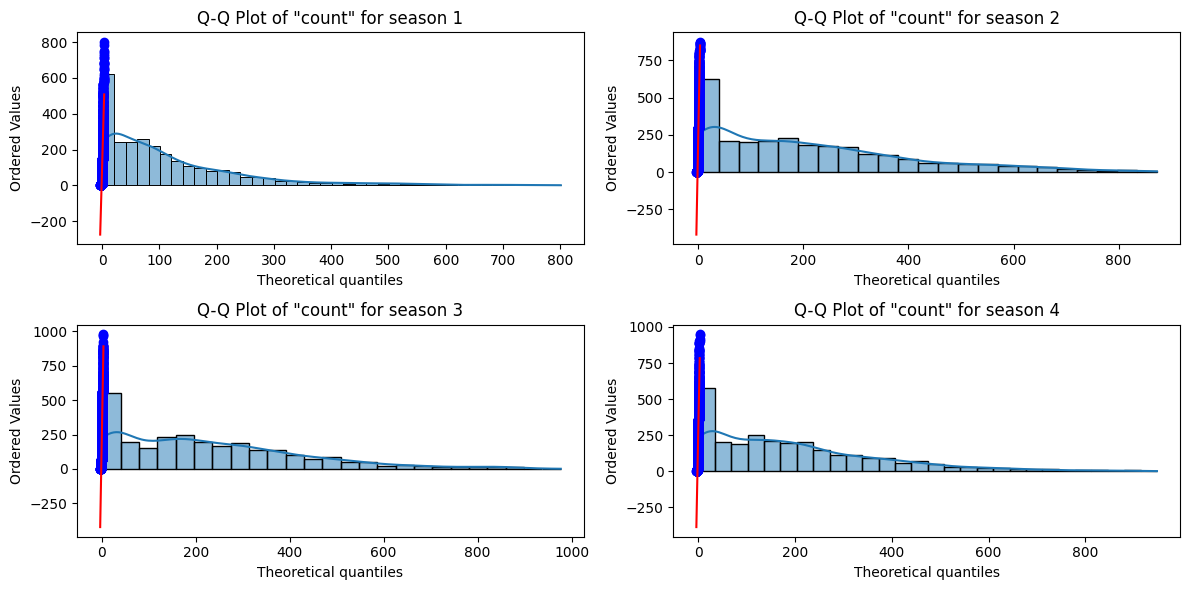

Shapiro-Wilk test for season 1: p-value = 8.749584618867662e-49
Shapiro-Wilk test for season 2: p-value = 6.039374406270491e-39
Shapiro-Wilk test for season 3: p-value = 1.043680518918597e-36
Shapiro-Wilk test for season 4: p-value = 1.1299244409282836e-39
Levene's test: p-value = 1.0147116860043298e-118
ANOVA test: F-statistic = 236.94671081032106, p-value = 6.164843386499654e-149
We reject the null hypothesis.


In [ ]:
plt.figure(figsize=(12, 6))
for season in df['season'].unique():
    plt.subplot(2, 2, season)
    sns.histplot(df[df['season'] == season]['count'], kde=True)
    plt.title(f'Distribution of "count" for season {season}')

    stats.probplot(df[df['season'] == season]['count'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of "count" for season {season}')
plt.tight_layout()
plt.show()

# Shapiro-Wilk test
for season in df['season'].unique():
    shapiro_test = stats.shapiro(df[df['season'] == season]['count'])
    print(f"Shapiro-Wilk test for season {season}: p-value = {shapiro_test.pvalue}")

# ii. Equality of Variance (Levene's test)
levene_test = stats.levene(*[df['count'][df['season'] == i] for i in df['season'].unique()])
print(f"Levene's test: p-value = {levene_test.pvalue}")

# iii. Continue analysis even if assumptions fail, but double-check with visual analysis.

# d. Set significance level and calculate test statistics/p-value
alpha = 0.05
anova_result = stats.f_oneway(*[df['count'][df['season'] == i] for i in df['season'].unique()])
print(f"ANOVA test: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# e. Decide whether to accept or reject the Null Hypothesis
if anova_result.pvalue <= alpha:
    print("We reject the null hypothesis.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

# **Observation**

* Shapiro-Wilk tests for every season return p ≪ 0.05, indicating the “count” distribution in each season significantly deviates from normality.

* Levene’s test p ≈ 1.01 × 10⁻¹¹⁸ shows variances differ across seasons, violating homogeneity of variance.

* One-way ANOVA yields F = 236.95 and p ≈ 6.16 × 10⁻¹⁴⁹, so we reject the null hypothesis of equal mean rentals across seasons.

* Bike‐sharing demand varies strongly by season:

* Peak usage in spring and summer months (warmer, longer days).

* Noticeably lower counts in fall and winter (cooler temperatures, shorter daylight).

* Despite significant ANOVA results, non-normality and unequal variances suggest confirming with a nonparametric test (Kruskal–Wallis) or applying robust post-hoc comparisons (e.g., Dunn’s test with Bonferroni adjustment).



**Q.6. Check if the Weather conditions are significantly different during different Seasons?**

In [ ]:
# c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns
contingency_table = pd.crosstab(df['weather'], df['season'])
print(contingency_table)

# d. Set a significance level and Calculate the test Statistics / p-value.
alpha = 0.05
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# e. Decide whether to accept or reject the Null Hypothesis.
if p_value <= alpha:
    print("We reject the null hypothesis.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

# f. Draw inferences & conclusions from the analysis and provide recommendations.
if p_value <= alpha:
    print("There is a significant association between weather conditions and seasons.")
    # Further analysis can be done to explore the relationship between specific weather conditions and seasons.
else:
    print("There is no significant association between weather conditions and seasons.")
    # The weather conditions are likely independent of the seasons, in terms of their frequency or distribution.

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0
Chi-square statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
We reject the null hypothesis.
There is a significant association between weather conditions and seasons.


# **Observation**

* The contingency table shows counts of each weather category within each season.

* The Chi-square test yields χ² = 49.16 with p-value ≈ 1.55 × 10⁻⁷.

* Since p-value < 0.05, we reject the null hypothesis of independence.

* There is a significant association between weather conditions and seasons.

* Clear weather (1) occurs most frequently across all seasons, but especially in fall (3) and summer (2).

* Misty/cloudy conditions (2) are fairly evenly distributed, with a slight uptick in winter (4).

* Precipitation events (3) are relatively consistent, with marginally higher counts in winter and summer.

* Severe conditions (4) are almost absent, appearing only once in spring (1).

* This implies seasonality in weather patterns aligns with expectations (e.g., fewer snow/fog events outside winter).

* For deeper insights, visualize the association with mosaic plots and investigate season-specific weather impacts on ridership.